In [1]:
import matplotlib.pyplot as plt
from  sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [27]:
X,Y=make_circles(n_samples=500,noise=0.02)

In [28]:
print(X.shape,Y.shape)

(500, 2) (500,)


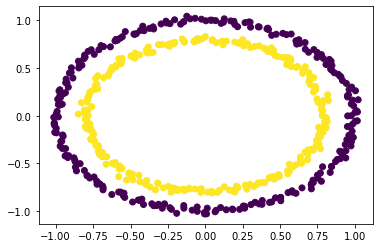

In [29]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [30]:
#Convert [x1,x2]  to [x1,x2,x3]  where X3=x1**2 +x2**2

In [31]:
def phi(X):
    """Non Linear Transformation"""
    x1=X[:,0]
    x2=X[:,1]
    x3=x1**2 +x2**2
    
    x_=np.zeros((X.shape[0],3))
    print(x_.shape)
    
    x_[:,:-1]=X
    x_[:,-1]=x3
    
    return x_

    

In [32]:
x_=phi(X)

(500, 3)


In [33]:
print(X[:3,:])

[[-0.95654409  0.12054911]
 [-0.51078312 -0.60232575]
 [-0.97294931  0.20797889]]


In [34]:
print(x_[:3,:])

[[-0.95654409  0.12054911  0.92950867]
 [-0.51078312 -0.60232575  0.6236957 ]
 [-0.97294931  0.20797889  0.98988557]]


In [55]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    x1=X[:,0]
    x2=X[:,1]
    x3=X[:,2]
    
    ax.scatter(x1,x2,x3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax
    
    

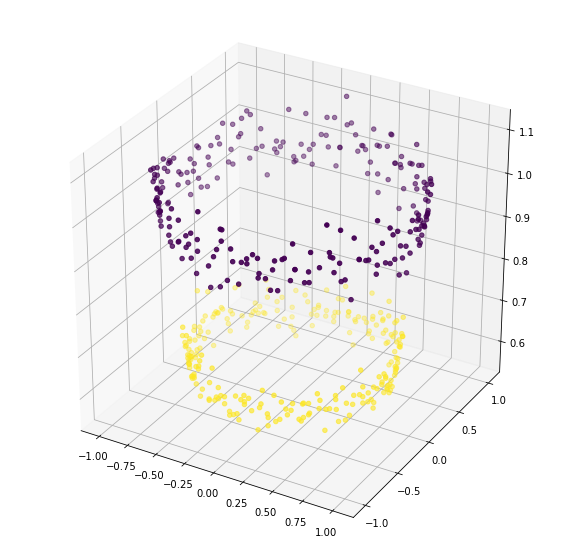

In [56]:
plot3d(x_)

## Logistic Classifier 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [58]:
lr=LogisticRegression()

In [59]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f" %(acc*100))

Accuracy X(2D) is 47.6000


In [60]:
#Not a good classifier for 2D case

## Logistic Classifier on Higher Dimension Space

In [61]:
acc =cross_val_score(lr,x_,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f" %(acc*100))

Accuracy X(2D) is 100.0000


## Visualise the Decision Surface

In [62]:
lr.fit(x_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
wts=lr.coef_
print(wts)

[[ -0.03912951  -0.01693974 -10.87087082]]


In [64]:
bias=lr.intercept_  #gives bias
print(bias)

[8.86809037]


In [65]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [66]:
 z=-(wts[0,0]*xx+wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.82608183 0.82248235 0.81888287 0.81528338]
 [0.82452356 0.82092408 0.8173246  0.81372511]
 [0.82296529 0.81936581 0.81576633 0.81216685]
 [0.82140702 0.81780754 0.81420806 0.81060858]]


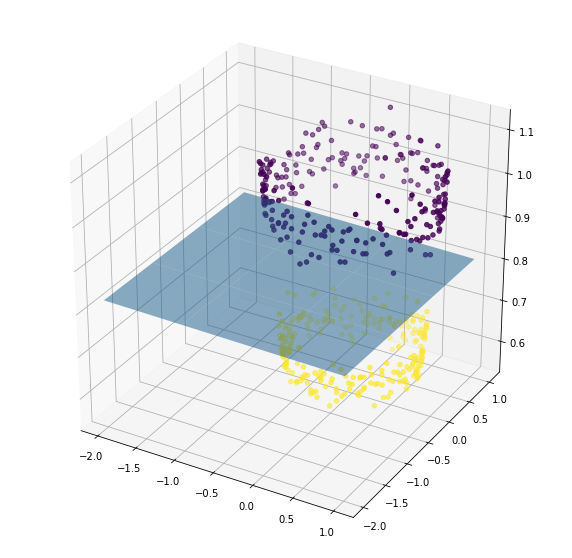

In [71]:
ax=plot3d(x_,False)
ax.plot_surface(xx,yy,z,alpha=0.5)
plt.show()